# Lab 1: Exploratory Data Analysis
## Craig Phayer - 21340633

### Task 1
Download the following dataset and example Jupyter notebook:

loans_train.csv
Lab 1 - Exploratory Data Analysis.ipynb

### Task 2
Download the dataset: bank.csv

This dataset is part of the Bank Marketing dataset from the UCI repository. Open the dataset in Excel and make yourself familiar with the meaning of the columns (refer to the description of the dataset at the UCI repository).

###  Task 3
Open a new Jupyter notebook. In your own notebook, perform EDA with the bank data set by following the examples in the provided notebook “Lab 1 - Exploratory Data Analysis.ipynb”.

- Formulate a particular question that might be interesting to answer by exploring this dataset.
- Calculate statistics for the numerical and categorical attributes.
- Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (in a markdown cell).
- Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).
- Make sure your conclusions are related to the question you have formulated.

In [57]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.simplefilter("ignore")

In [36]:
df = pd.read_csv('bank.csv')

In [37]:
# 1st 10 rows
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [38]:
# last 10 rows
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [39]:
# statistics
# Freund and Perles formulae used by panadas
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [40]:
df.isnull().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

## What is the correlation between people who are subscribed vs those who are not? 

In [41]:
df['age'].mean()

np.float64(41.753018108651915)

In [42]:
df['age'].median()

np.float64(38.0)

In [43]:
df['duration'].std()

np.float64(221.55729484085734)

In [44]:
df['marital'].value_counts(normalize=True)

marital
married     0.5555
single      0.3370
divorced    0.1075
Name: proportion, dtype: float64

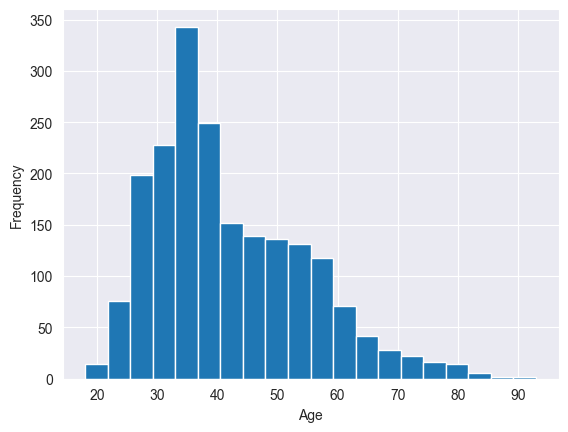

In [45]:
# age distribution
df['age'].hist(bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

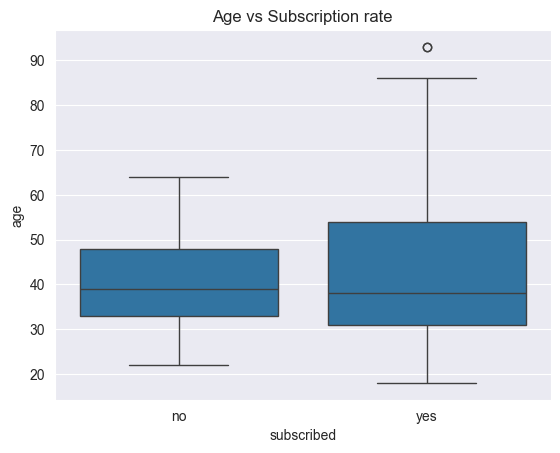

In [46]:
# Age vs Subscription rate
sns.boxplot(x='subscribed', y='age', data=df)
plt.title('Age vs Subscription rate')
plt.show()

### Age distribution
- Age distribution is right-skewed with most people in their 30s and 40s with a mean age of 41.75 and the number of people decreasing as age increases.
- The banks marketing campaign is more successful with younger people as the subscription rate is higher for people in their 20s and 30s as seen in the above boxplot.

### Age vs Subscription rate
- Those who subscribed more often are higher than the median age (38.0).
- The boxplot also contains some strong outliers in the 90+ age group.

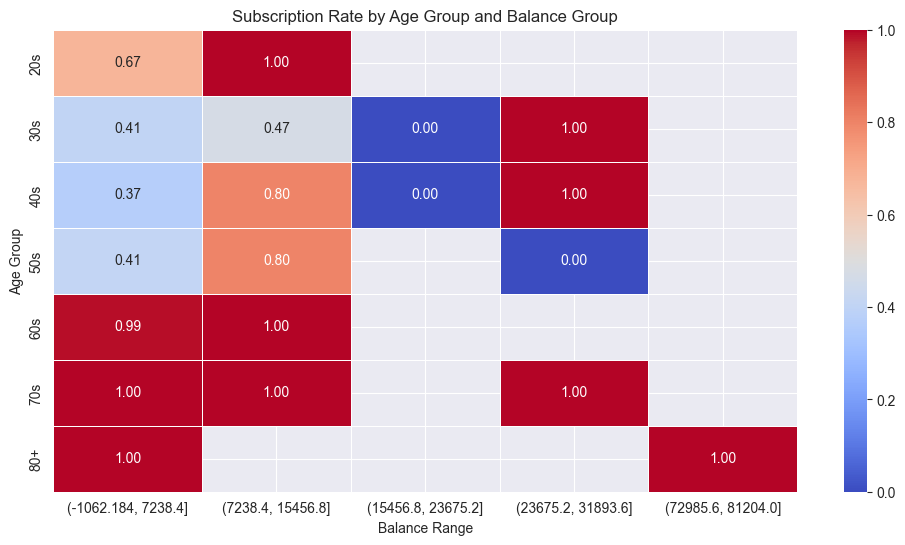

In [47]:
df["subscribed"] = df["subscribed"].map({"yes": 1, "no": 0})

# Create bins for Age and Balance to reduce unique values
df["age_group"] = pd.cut(df["age"], bins=[20, 30, 40, 50, 60, 70, 80, 90], labels=["20s", "30s", "40s", "50s", "60s", "70s", "80+"])
df["balance_group"] = pd.cut(df["balance"], bins=10)

# pivot table with mean subscription rate
heatmap_data = df.pivot_table(index="age_group", columns="balance_group", values="subscribed", aggfunc=np.mean)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".2f")

plt.title("Subscription Rate by Age Group and Balance Group")
plt.xlabel("Balance Range")
plt.ylabel("Age Group")
plt.show()

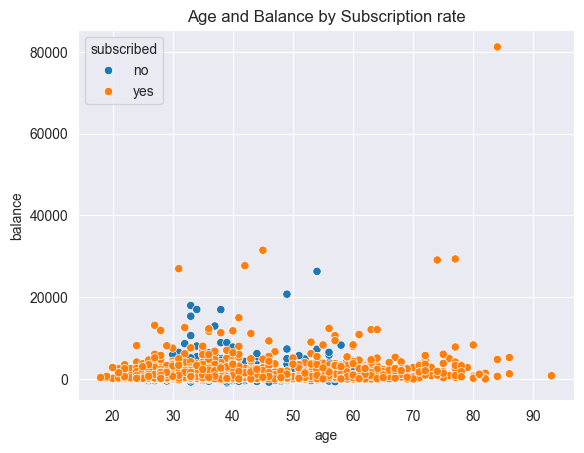

In [13]:
# Age and Balance by Subscription rate
sns.scatterplot(x='age', y='balance', hue='subscribed', data=df)
plt.title('Age and Balance by Subscription rate')
plt.show()

### Age and Balance by Subscription rate
- as seen in the scatter plot and heatmap there is very little correlation between balance and subscription rate as the no. of people who are subscribed and not have a wide range of balances with no trend that can be seen. 
- the scatter plot follows the trend of customers who subscribed tend to have a higher median age than those who did not
- The scatter plot also better shows the outliers within the dataset in the 70 - 90+ age group.
- the heatmap helps better show the subscription rate by age group and balance group with mostly every customer 60+ having subscribed.(This probably shows that older people are more worried about losing and are more inclined to try do something with their money)

In [14]:
# job distribution
df['job'].value_counts()

job
management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: count, dtype: int64

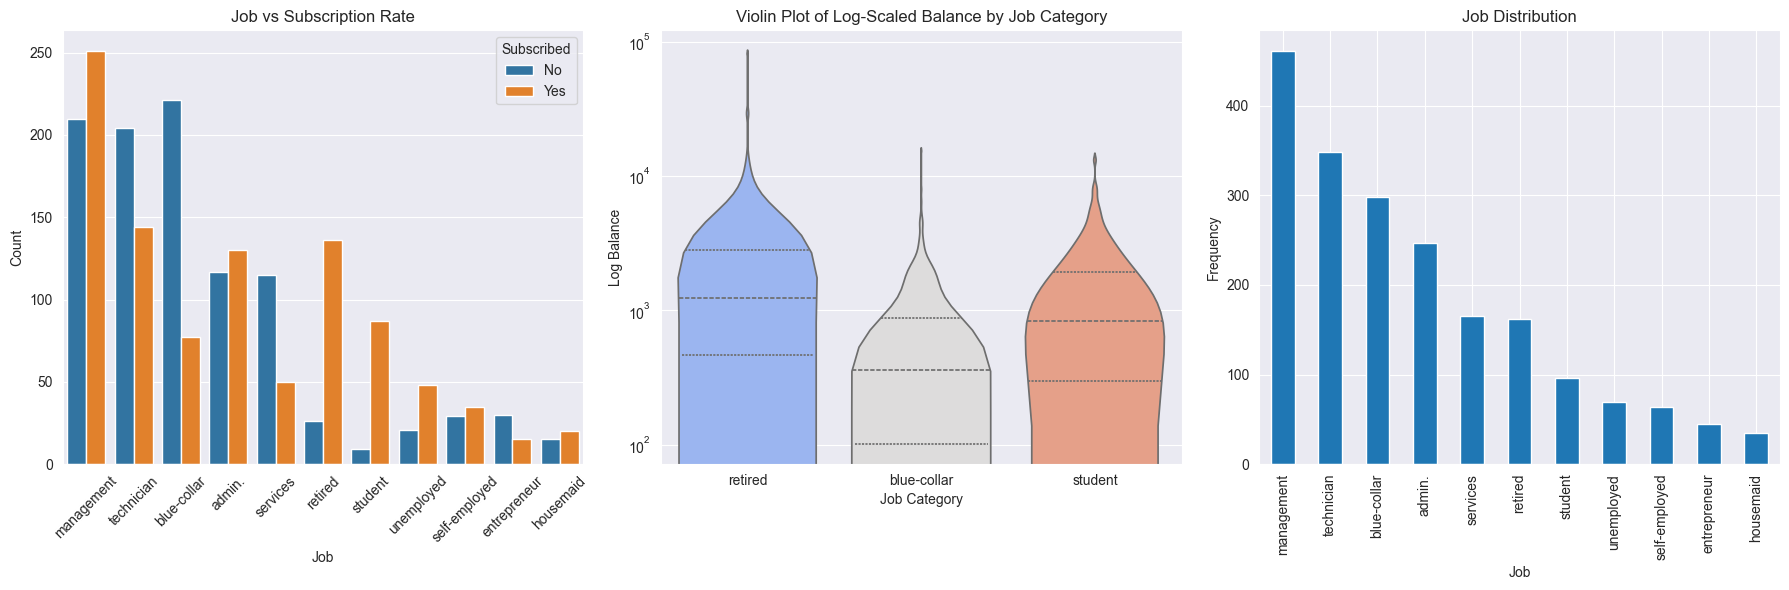

In [58]:
# Job vs Subscription rate
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(x='job', hue='subscribed', data=df, order=df["job"].value_counts().index, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set_title('Job vs Subscription Rate')
axes[0].set_xlabel("Job")
axes[0].set_ylabel("Count")
axes[0].legend(title="Subscribed", labels=["No", "Yes"])

df_filtered = df[df["job"].isin(["blue-collar", "retired", "student"])]
sns.violinplot(x="job", y="balance", data=df_filtered, inner="quart", palette="coolwarm", ax=axes[1])
axes[1].set_yscale("log")  # Apply log scale to balance
axes[1].set_title("Violin Plot of Log-Scaled Balance by Job Category")
axes[1].set_xlabel("Job Category")
axes[1].set_ylabel("Log Balance")

df['job'].value_counts().plot(kind='bar')
axes[2].set_xlabel('Job')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Job Distribution')

plt.tight_layout()
plt.show()

### Job vs Subscription rate
- Management and Admin jobs have the highest subscription rates. Could indicate that people with more stable, well-paying jobs are more likely to subscribe when compared to blue-collar workers: Blue-collar have one of the lowest subscription rates ratio. This could be due to the fact that some if not most Blue-collar jobs are payed in cash and not through banking.
- Here we also see so more outliers with students having a skewed subscription rate leaning towards yes. (most likely due to bank marketing targeting younger people who are more likely to be trying to save money for the future)
- Retired and unemployed people also have a very high subscription rate ratio leaning towards "yes" as they are more likely to be trying to save money because they are no longer working.

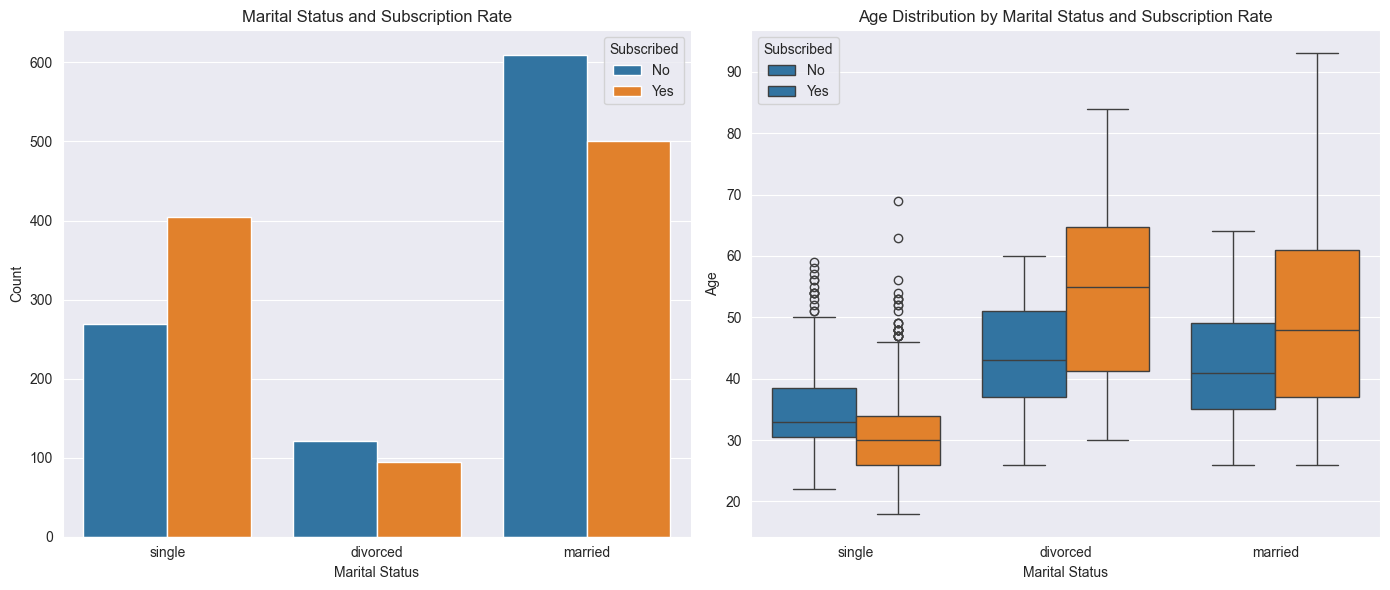

In [65]:
# Marital Status and Education by Subscription rate
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='marital', hue='subscribed', data=df, ax=axes[0])
axes[0].set_title('Marital Status and Subscription Rate')
axes[0].set_xlabel("Marital Status")
axes[0].set_ylabel("Count")
axes[0].legend(title="Subscribed", labels=["No", "Yes"])

sns.boxplot(x='marital', y='age', hue='subscribed', data=df, ax=axes[1])
axes[1].set_title('Age Distribution by Marital Status and Subscription Rate')
axes[1].set_xlabel("Marital Status")
axes[1].set_ylabel("Age")
axes[1].legend(title="Subscribed", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

### Marital Status by Subscription rate
- The count plot seems fairly balanced with no extreme outliers like before. From it single people have the highest subscription rate ratio leaning towards "yes". This could indicate that people who are single have more financial flexibility and are more likely to subscribe.
- Married people have the highest total number of customers, but lower subscription rate. This might suggest that financial commitments such as mortgages make them less likely to subscribe.
- Divorced people have the lowest subscription rate and for the most part doesn't follow any trend, which could be due to the fact that they are more likely to have financial commitments such as child support.

### Age Distribution by Marital Status and Subscription Rate
- Overall, those who subscribed tend to have a higher median age than those who don't
- Single people who subscribed tend to be younger, while married and divorced subscribers are typically older. This could indicate that age and marital status together influence financial decision-making, with older married individuals potentially having more disposable income or financial planning needs.
- The boxplot also contains some strong outliers in the 50+ range which if we look back at scatter plot from earlier matches the high number of people in the same age groups who were subscribed.